In [1]:
from pathlib import Path
from load_mri import load_dataset
from torchvision import transforms
import torch

ORIGINAL_DATA_DIR =  Path("./data")
train_dataset_name = "fastmri_knee_singlecoil"
img_size = 128 

transform = transforms.Compose([transforms.Resize(img_size)])

train_dataset = load_dataset(
        train_dataset_name, ORIGINAL_DATA_DIR, transform, train=True
    )

test_dataset = load_dataset(
    train_dataset_name, ORIGINAL_DATA_DIR, transform, train=False
)

100%|██████████| 399M/399M [00:05<00:00, 70.6MiB/s] 


In [2]:
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=3, shuffle=True, num_workers=4
)

test_dataloader = torch.utils.data.DataLoader(
    test_dataset, batch_size=3, shuffle=False, num_workers=4
)

In [5]:
sample.shape

torch.Size([3, 2, 128, 128])

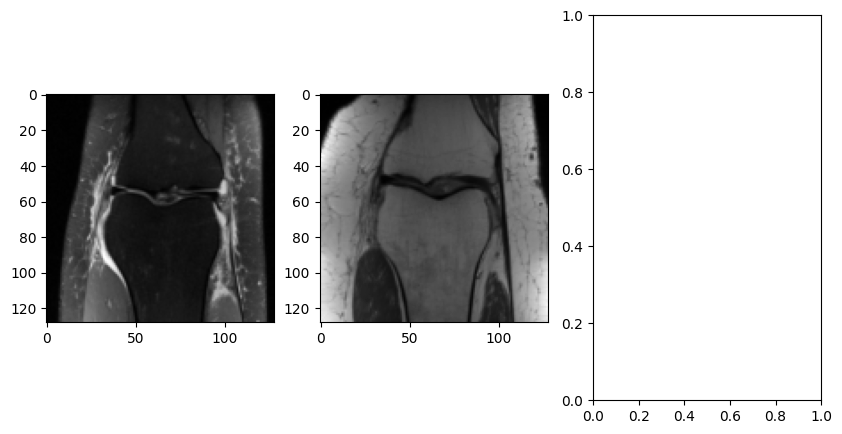

In [15]:
import matplotlib.pyplot as plt

sample = next(iter(train_dataloader))


fig, axs = plt.subplots(1, 3, figsize=(10, 5))


for i in range(2):
    img_abs = sample[i].pow(2).sum(0).sqrt()

    axs[i].imshow(img_abs.numpy(), cmap="gray")

plt.show()
